# Temperature Program Desorption Curves

## Peter Tran's Code

In [1]:
import numpy as np
#the goal of this code is to calculate the highest theoretical desorption rate from the Derivative Temperature Programed Desorption (DTPD) Curves
#The highest temperature is the max value calculated from equation (7) from Yun-Hang Hu paper in the temperature range 200 to 600 K
 
#List of Constants:
#order
n=1
 
#Adsorption Enthalpy (assummed to be constant), kJ/mol --> *1000 J/mol:
#Change this adsorption energy value from table S6 in Supplemental Infomation  as we change the compound:
#ask for adsorption energy value:
H = float(input("Enter you H value: "))
 
#Gas Constant, J/mol-K:
R= 8.3145
 
#Heating rate (assumed to be constant), K/min*(1min/60s):
beta=10/60
 
#Function F(T), equation (6) from Yun-Hang Hu paper:
def F_T(T):
  #Activation Energy at Temperature T and adosrption enthalpy H:
    E= H-5/2*R*T
  #X value:
    X=E/(R*T)
  #McLaurin Series expansion:
    #method 1: Expansion=1-2/X+6/X**2-24/X**3+120/X**4-720/X**5+5040/X**6-40320/X**7+362880/X**8-3628800/X**9
    #method 2:
    Expansion=0
    #order of McLaurin Series expansion, 50 terms are enought to have accuracy at least <0.000001:
    o = 50    
    for n in range(1,o,1):
      #1. calculate the factorial:
      factorial=1
      for i in range (1,n,1):
        factorial= factorial*i
      #2. Add to the expansion:
      Expansion +=((-1)**(n-1)) * factorial/X**(n-1)
 
    
  #F(T) equation:
    F_T=E*A/(R*beta)*(np.exp(-X)*Expansion/X**2)
    return F_T 
 
#Calculate the desorption rate -d_theta/d_T at temperature T using equation 8a form Yun-Han Hu paper:
def desorption(T):
  #1. Activation Energy at Temperature T and adosrption enthalpy H:
        E= H-5/2*R*T 
        
        #X value:
        X=E/(R*T)
 
  #2. calculate F(T) from function F(T) defined above:
        FT=F_T(T)
  #3. Calculate the desorption rate -d_theta/d_T at temperature T:
    #define variable "Rate" as "-dTheta/dT"
    #assume theta_o =1
        #From the Yun-Hang Ha paper: 
        Rate = (A/beta)*np.exp(-X)*np.exp(-FT)
        return Rate
#loop constant A #preexponential factor, s^-1:
for a in range(11,15,1):
  A=10**a
  #loop from T1 to T2 to calculate Desorption Rate
  T1= 200
  T2= 900
  MaxDesorption = desorption(T1)
  MaxTemp= T1
 
  for T in range(T1,T2+1):
    
    #Activation Energy at Temperature T and adosrption enthalpy H:
    E= H-5/2*R*T 
 
    Rate= desorption(T) 
 
    #check for maximum desorption rate:
    #print(T," ", np.log10(desorption(T)))
    if Rate > MaxDesorption:
      MaxDesorption = Rate
      MaxTemp = T
 
  #Finally, print out the temperature T that have highest desorption rate
  print("When A=10^",a,",the temperature T=",MaxTemp, "K, the maximum rate of desorption -dTheta/dT= ",MaxDesorption)

Enter you H value: 12800
When A=10^ 11 ,the temperature T= 616 K, the maximum rate of desorption -dTheta/dT=  inf
When A=10^ 12 ,the temperature T= 616 K, the maximum rate of desorption -dTheta/dT=  inf
When A=10^ 13 ,the temperature T= 616 K, the maximum rate of desorption -dTheta/dT=  inf
When A=10^ 14 ,the temperature T= 616 K, the maximum rate of desorption -dTheta/dT=  inf


<ipython-input-1-674395627245>:59: RuntimeWarning: overflow encountered in exp
  Rate = (A/beta)*np.exp(-X)*np.exp(-FT)


# Woody's Code

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.signal import argrelextrema
from scipy.special import factorial
%matplotlib inline

mpl.style.use('seaborn-poster')

/home/woodrowwilson/Programs/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
R= 8.31446261815324              # Gas Constant, J/mol-K
n=1                              # Coverage order
beta=10                          # Heating rate, K/s
A = 1.0E13                       # Pre-exponential factor (1/s)
theta0 = 1                       # Initial coverage
E = 204700                       # Activation Energy, kJ/mol
T = np.linspace(650, 900, 1000)  # Temperature Range

In [3]:
def taylorseries(x):
    
    tolerance = 1.0E-6
    series = 0.0
    index = 1
    
    while True:
        
        a = (-1)**(index-1)
        b = factorial(index) 
        c = (x)**(index -1)
        term = a*b/c
        
        series += term
        index += 1
        
        if np.all(term < tolerance):
            break
        
    return series
    

def FT(E,A,R,B,T):
    
    X = E/R/T
    
    term1 = E*A/R/B
    term2 = np.exp(-1*X)/X/X
    term3 = taylorseries(X)
    
    F = term1*term2*term3
    return F
    


def theta(n, F, t0):
    
    if n == 1:
        t = t0*np.exp(-F)
        
    else:
        a = (n-1)*F
        b = (t0)**(1-n)
        t = (a+b)**(1/(n-1))        
        
    return t


def dtheta_dT(A, beta, R, T, n, theta0, E):
    
    a = A / beta
    b = np.exp(-E/R/T)
    c = theta(n, FT(E,A,R,beta,T), theta0)
    
    TPD = a*b*c
    return TPD


def d2theta_dT2(A, beta, R, T, n, theta0, E):
    
    TPD = dtheta_dT(A, beta, R, T, n, theta0, E)
    
    a = n / theta(n, FT(E,A,R,beta,T), theta0)
    b = E/R/T/T
    
    DTPD_1 = TPD*(-a*TPD+b)
    return DTPD_1


def d3theta_dT3(A, beta, R, T, n, theta0, E):
    
    TPD = dtheta_dT(A, beta, R, T, n, theta0, E)
    DTPD_1 = d2theta_dT2(A, beta, R, T, n, theta0, E)
    
    t = theta(n, FT(E,A,R,beta,T), theta0)
    a = E/R/T/T
    b = n / t
    c = n / t / t
    d = E/R/T/T/T
    
    DTPD_2 = DTPD_1*(a-2*b*TPD) + TPD*(-c*TPD*TPD-2*d)
    return DTPD_2



In [4]:
x = T
y1 = dtheta_dT(A, beta, R, T, n, theta0, E)
y2 = d2theta_dT2(A, beta, R, T, n, theta0, E)
y3 = d3theta_dT3(A, beta, R, T, n, theta0, E)

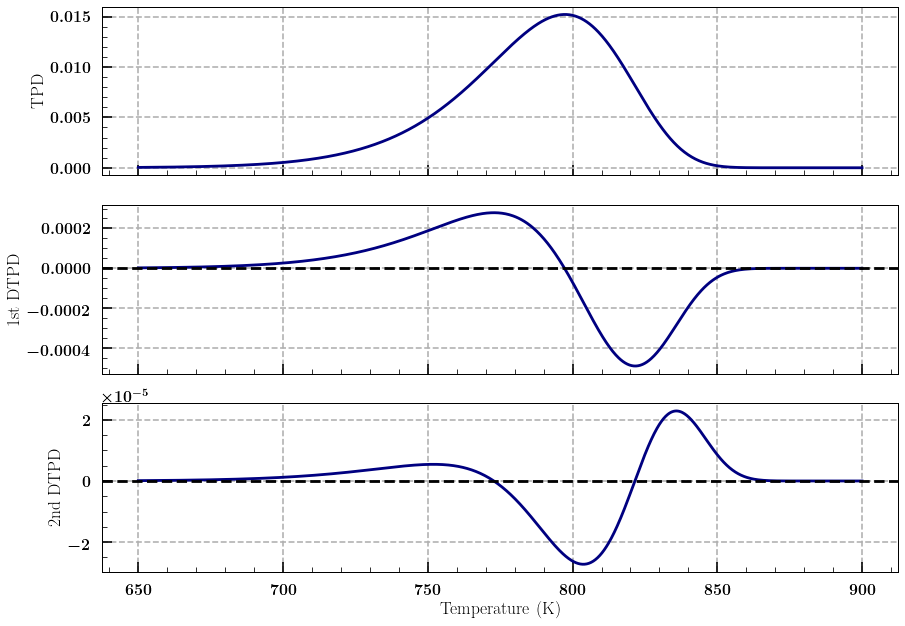

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, sharex=True)

ax1.plot(x,y1)
ax1.set_ylabel('TPD')

ax2.plot(x,y2)
ax2.axhline(y=0, color='k', linestyle='--')
ax2.set_ylabel('1st DTPD')

ax3.plot(x,y3)
ax3.set_ylabel('2nd DTPD')
ax3.set_xlabel('Temperature (K)')
ax3.axhline(y=0, color='k', linestyle='--')


In [6]:
Tmax = x[argrelextrema(y1, np.greater)]

dTmax = x[argrelextrema(y2, np.greater)]
dTmin = x[argrelextrema(y2, np.less)]

ddTmax = x[argrelextrema(y3, np.greater)]
ddTmin = x[argrelextrema(y3, np.less)]

print("Tmax = ", Tmax)

Tmax =  [797.3973974]
